# Demo 9:  Momentum Space

In this demo, we'll go ahead and verify some of the claims that were made in class today about the the momentum space representation of quantum mechanics.

We will first explore some properties of the momentum space eigenfunctions, and then move to exploring the both the position and momentum space eigenstates for the Eckart well. 



# <i class="fa fa-book"></i> Step 1: Import the required modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
% matplotlib inline
##this let's us print out the available functions in our library
import pydoc 
#This is how we'll import our own home-made modules
import sys
sys.path.append('../library')
sys.path.append('../../library')
sys.path.append('/home/student/chem160/library')
import quantumWorld as qworld
qworld.fancy_plotting()

# <i class="fa fa-book"></i> Step 2: Initial conditions

We are defining a grid using the following values:

In [2]:
NPTS = 2048
XSTART = -20.0
XEND = 20.0
x = np.linspace(XSTART,XEND,NPTS)

# <i class="fa fa-wrench"></i> Step 3: Defining functions
## Momentum eigenfunction

We saw in lecture that the momentum operator was
$$-i \hbar \frac{d}{dx},$$
which implies that the eigenstates are given by:
$$ \frac{1}{\sqrt{2 \hbar \pi}} e^{i k x/\hbar}$$.

**Note:** We're going to set $\hbar$ to 1 using some units magic. We do not lose generality because it's only really a bookkeeping factor. 

In [3]:
def momentum_eigenfunction(k, x, hbar = 1):
    '''
    This function will return the value of a momentum eigenfunction with momentum k at position x
    
    INPUT
    --------------------------
    k: scalar or vector that represents the momentum
    x: scalar or vector that represents the position
    
    OUTPUT
    --------------------------
    Value of the momentum eigenfunction for momentum k and position x
    '''
    psi = (1/np.sqrt(hbar*np.pi*2))*np.exp(1j*k*x/hbar)
    return psi

## Overlap
This tells us that the overlap of two momentum eigenfunctions momenta $k_1$ and $k_2$, respectively, is going to be given by
$$\frac{1}{2\pi} \int_{-\infty}^{\infty} (e^{i k_1 x})^\dagger e^{i k_2 x}  dx, $$
which simplifies to:
$$\delta(k_1 - k_2).$$

In [4]:
def overlap(x, k1, k2):
    '''
    This function will return the inner part of the integrand to be used in a second to actually
    do the integration. We will want to return \psi^\dagger \psi
    INPUT
    --------------------------
    k1: scalar or vector that represents the momentum of the first plane wave
    k2: scalar or vector that represents the momentum of the second plane wave
    x: scalar or vector that represents the position
      
    OUTPUT
    --------------------------
    The value of the overlap integrand for momenta k1 and k2 and position x.
    '''
    psi1 = momentum_eigenfunction(k1, x)
    psi2 = momentum_eigenfunction(k2, x)
    integrand = np.conjugate(psi1) * psi2

    return  integrand

# <i class="fa fa-wrench"></i> Step 4: Are they orthogonal?

Next, let's actually perform the integration to check the fact that they are indeed orthogonal. We're going to store the overlaps in something called an *overlap matrix*.

This will be an incredibly important matrix later in the course when we explore electronic structure. For now, we will begin by trying to understand it's physical interpretation before we understand the applications later in the course.

To build the overlap matrix, you'll want to do the following:

* Make an array of momenta that ranges from 0 to 2$\pi$ in steps of $\pi/5$
* Pre-allocate a matrix of zeros of size NxN where N is the length of the k_array. I did this via: **overlap_matrix = np.zeros((len(k_array), len(k_array)))**
* Next, write two for loops to loop over each combination of k1 and k2. For each combination, you will integrate the overlap function that you wrote above using the quad function and assigning it to the corresponding element of the overlap matrix. I would recomend doing this via **overlap_matrix[i, j], error = integrate.quad(overlap, -upperLim, upperLim, args=(k1, k2), limit=2000)** 
* Finally, we'll plot the overlap matrix with the matshow method. Simply type **matshow(np.abs(overlap_matrix))**

In [5]:
upperLim = 10000
k_array = np.arange(0, 2*np.pi, np.pi/5)
overlap_matrix = np.zeros((len(k_array), len(k_array)))
for i,k1 in enumerate(k_array):
    for j,k2 in enumerate(k_array):
        # One lines of code
        integral, error = integrate.quad(overlap, -upperLim, upperLim, args=(k1, k2), limit=2000)
        overlap_matrix[i, j]= integral

/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:376: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


## <i class="fa fa-line-chart"></i> Plot the matrix
Notice that we only see that the diagonal elements have magnitude.

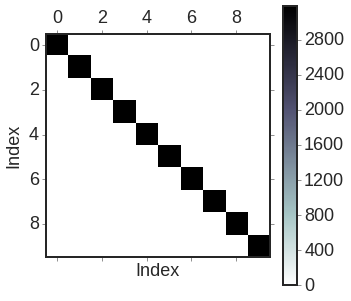

In [6]:
plt.matshow(np.abs(overlap_matrix),cmap=plt.cm.bone_r)
plt.xlabel('Index')
plt.ylabel('Index')
plt.colorbar()
plt.show()

## <i class="fa fa-question-circle"></i> Does this provide an insight into orthogonality? <br> What would the matrix look like if the eigenfunctions weren't orthogonal?

#  Step 5: Eckart well

Now, let's turn our attention to examining the Eckart well, that we discussed in class. First, let's go ahead and write functions that return the barrier. 

## <i class="fa fa-wrench"></i> Define the potential

In the position space, we get:
$$V(x) = \frac{- V_0}{ cosh^2(\frac{x}{a}) },$$


In [7]:
def eckart_position(x, V0 = 10.0, a = 1.0):
    '''
    Write a function that returns the eckart potential in the position representation
    INPUT
    -----------------
    x: scalar or vector that represents the position
    V0: keyworded argument with a default value of 10.0. It's just the depth of the well
    a: keyworded argument with a default value of 1.0. It's related to the width of the well
    
    OUTPUT
    ----------------
    The value of the eckart well in the position representation
    '''
    # one line of code

    Vx = -V0/(np.cosh(x / a))**2
    return Vx

and in the momentum space we get:
$$V(k) = -a^2 k \sqrt{\frac{\pi}{2}} \frac{V_0}{sinh(\frac{a k \pi}{2})} $$

In [8]:
def eckart_momentum(k, V0 = 10.0, a = 1.0):
    '''
    Write a function that returns the eckart potential in the momentum representation
    INPUT
    -----------------
    k: scalar or vector that represents the momentum
    V0: keyworded argument with a default value of 10.0. It's just the depth of the well
    a: keyworded argument with a default value of 1.0. It's related to the width of the well
    
    OUTPUT
    ----------------
    The value of the eckart well in the momentum representation
    '''
    # one line of code
    Vk = -a**2*k*np.sqrt(np.pi/2)*V0/np.sinh(a*k*np.pi/2)
    return Vk

## <i class="fa fa-wrench"></i> Using DVR
With the potentials in hand, we will next use the DVR method to compute the approximate wavefunctions and energies. This method is in principle similar to the finite difference methods that were introduced earlier in that it permits the computation of discritized eigenstates. The most significant difference here is that it is much more accurate, efficient, and rapidly converging. Because it is much more robust, we will use it both here and in the considerable exercise. 

The first thing to do is to make the discritized Hamiltonian matrix. 

The method to do this is in the quantumWorld module called  **Hmatrix_dvr(x,vx)** (ie, call qworld.Hmatrix_dvr() ). The Hdvr method takes 2 arguments:

1. **x**, a position grid vector with number of points **NPTS**, from **XSTART** to **XEND**.
2. **vx**, a vector representing a potential $V(x)$ evaluated at **x**, in this case (eckart_space).

We will get back the discretized Hamiltonian in that order. 

Next, we need to compute the eigenvalues and vectors of this newly discretized Hamiltonian. We will do this by calling the hermitian eigensolver (eigh) in the following way: **E, Psi = sp.linalg.eigh(H)**.
Obtaining eigenvales **E** and eigenfunctions **Psi**.

Create **H** and solve below:

In [9]:
H = qworld.Hmatrix_dvr(x, eckart_position(x))
E, Psi = sp.linalg.eigh(H)

## Extra: On DVR
While this method was written to be used as a black box, feel free to read more about it in this wonderful review article written by JC Light (http://light-group.uchicago.edu/dvr-rev.pdf). 

## Potential in space ($x$)


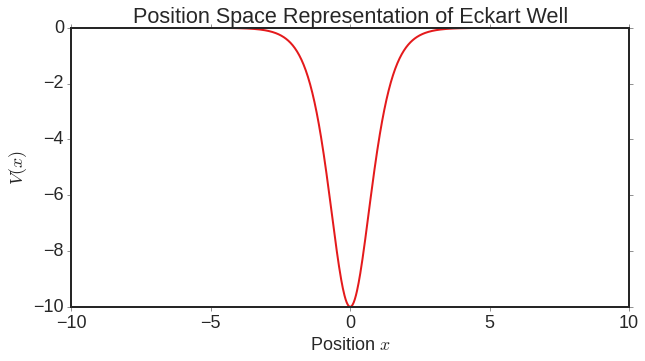

In [10]:
plt.plot(x,eckart_position(x))
plt.title('Position Space Representation of Eckart Well')
plt.xlabel('Position $x$')
plt.ylabel('$V(x)$')
plt.xlim([-10.0, 10.0])
plt.show()

## Eigenfunctions in space ($x$)

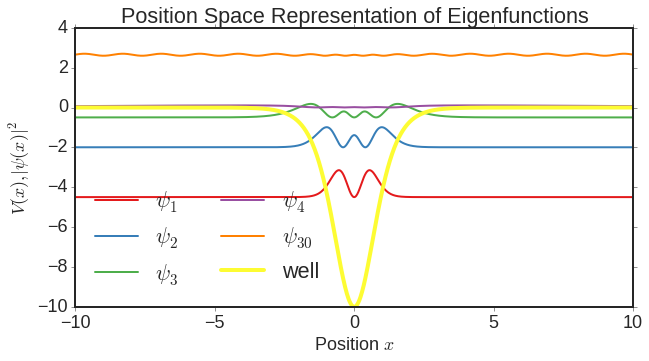

In [11]:
scaling = np.max(np.abs(eckart_position(x)))*10

for i in [1,2,3,4,30]:
    y = scaling*np.abs(Psi[:,i])**2+E[i]
    plt.plot(x,y,label='$\psi_{%d}$'%i)

plt.plot(x,eckart_position(x),label='well',lw=4)
plt.title('Position Space Representation of Eigenfunctions')
plt.xlabel('Position $x$')
plt.ylabel('$V(x),|\psi(x)|^2$')
plt.xlim([-10,10])
plt.legend(loc='best',ncol=2)
plt.show()

## Transforming into momentum space <br> Also known as K-space

Since in quantum mechanics, the De Broglie relation $p = \hbar k$ states that momentum and wavevectors for a free particle are proportional to each other.

Now we compute the frequency space representation of the eigenstates. 

We do this by numerically taking the fourier transform using the fast fourier transform algorithm.

See these notes if you want to learn more about the FFT: http://www.math.ethz.ch/education/bachelor/seminars/fs2008/nas/woerner.pdf

It's one of the single most important algorithms ever developed!

In [12]:
Psi_k = np.zeros_like(Psi, dtype=complex)

for i in range(len(x)):
    Psi_k[:, i] = np.fft.fftshift(np.fft.fft(Psi[:, i]))/np.sqrt(len(x))
freq = np.fft.fftshift(np.fft.fftfreq(len(x), d = np.diff(x)[0]))

## K-space eigenfunctions

First superimposed over the well 

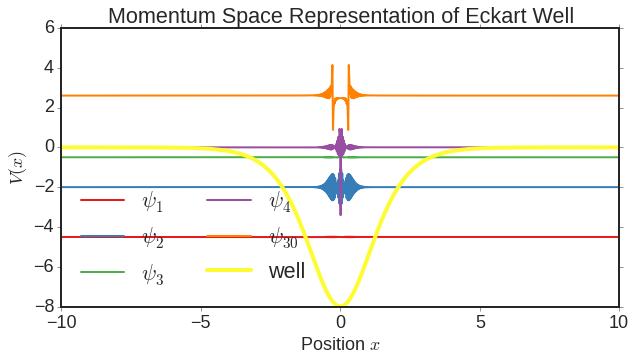

In [14]:
scaling = np.max(np.abs(eckart_momentum(x)))/2.0

for i in [1,2,3,4,30]:
    y = scaling*Psi_k[:,i]+E[i]
    plt.plot(x,y,label='$\psi_{%d}$'%i)

plt.plot(x,eckart_momentum(x),label='well',lw=4)
plt.title('Momentum Space Representation of Eckart Well')
plt.xlabel('Position $x$')
plt.ylabel('$V(x)$')
plt.xlim([-10,10])
plt.legend(loc='best',ncol=2)
plt.show()


Since we have complex-valued eigenfunctions, we can get more intuition with the pdf ($|\psi(k)|^2$) then plotting just the real and imaginary part:

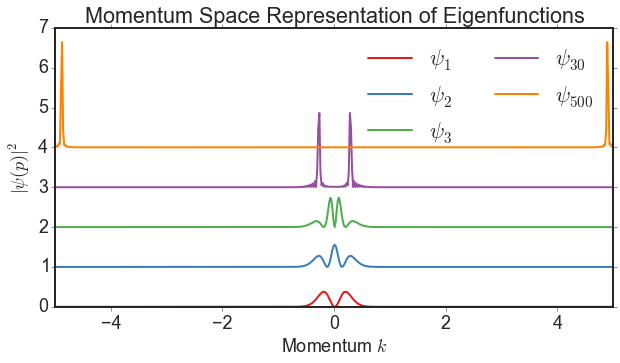

In [18]:
scaling = 10

for indx,i in enumerate([1,2,3,30,500]):
    y = scaling * np.abs(Psi_k[:,i])**2 +indx
    plt.plot(x,y,label='$\psi_{%d}$'%i)
    
plt.title('Momentum Space Representation of Eigenfunctions')
plt.xlabel('Momentum $k$')
plt.ylabel('$|\psi(p)|^2$')
plt.xlim([-5,5])
plt.legend(loc='best',ncol=2)
plt.show()


## <i class="fa fa-question-circle"></i> <br> How do you interpret the pdfs of the momentum eigenfunctions? <br> How do the parameter $V_0$ and $a$ affect the well? <br> and the eigenfunctions?
